In [1]:
import ROOT

Welcome to JupyROOT 6.28/06


In [2]:
#%jsroot on

In [3]:
ROOT.gROOT.LoadMacro("CLICdpStyle.C")
ROOT.CLICdpStyle()

In [4]:
model1 = "FCCee_o1_v04"
model2 = "CLD_o2_v05"

In [5]:
f1 = ROOT.TFile(f"Output/plots/{model1}/plots.root", "read")
f2 = ROOT.TFile(f"Output/plots/{model2}/plots.root", "read")

In [6]:
plots = [
    "mu-_t/delta_d0",
    "mu-_t/delta_z0",
    "mu-_t/delta_phi",
    "mu-_t/delta_theta",
    "mu-_t/sdelta_pt",
    "mu-_p/sdelta_pt",
]
momenta = [
    "p = 1 GeV",
    "p = 10 GeV",
    "p = 100 GeV",
]
angles = [
    "#theta = 10#circ",
    "#theta = 30#circ",
    "#theta = 50#circ",
    "#theta = 70#circ",
    "#theta = 89#circ",
]

Info in <TCanvas::Print>: pdf file Output/comparison/mu-_t/delta_d0.pdf has been created
Info in <TCanvas::Print>: pdf file Output/comparison/mu-_t/delta_z0.pdf has been created
Info in <TCanvas::Print>: pdf file Output/comparison/mu-_t/delta_phi.pdf has been created
Info in <TCanvas::Print>: pdf file Output/comparison/mu-_t/delta_theta.pdf has been created
Info in <TCanvas::Print>: pdf file Output/comparison/mu-_t/sdelta_pt.pdf has been created
Info in <TCanvas::Print>: pdf file Output/comparison/mu-_p/sdelta_pt.pdf has been created


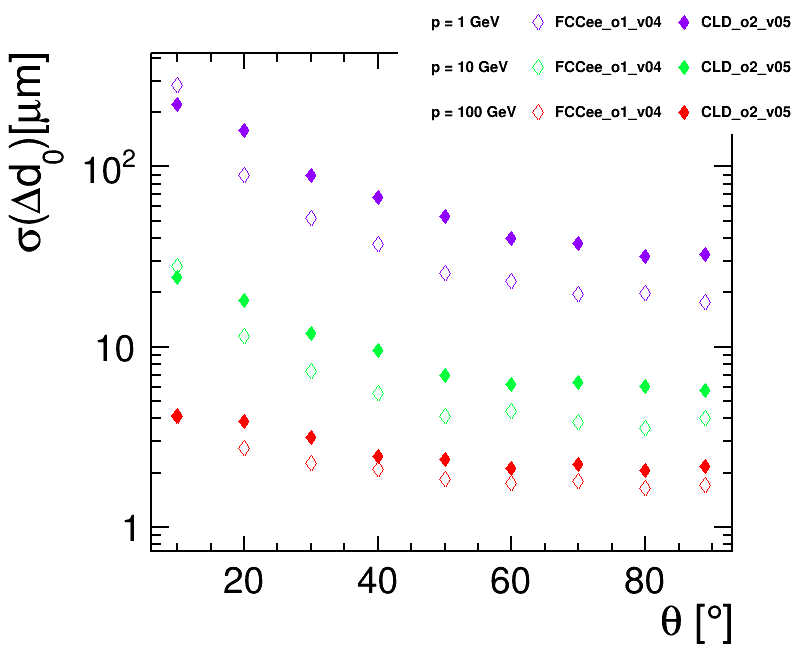

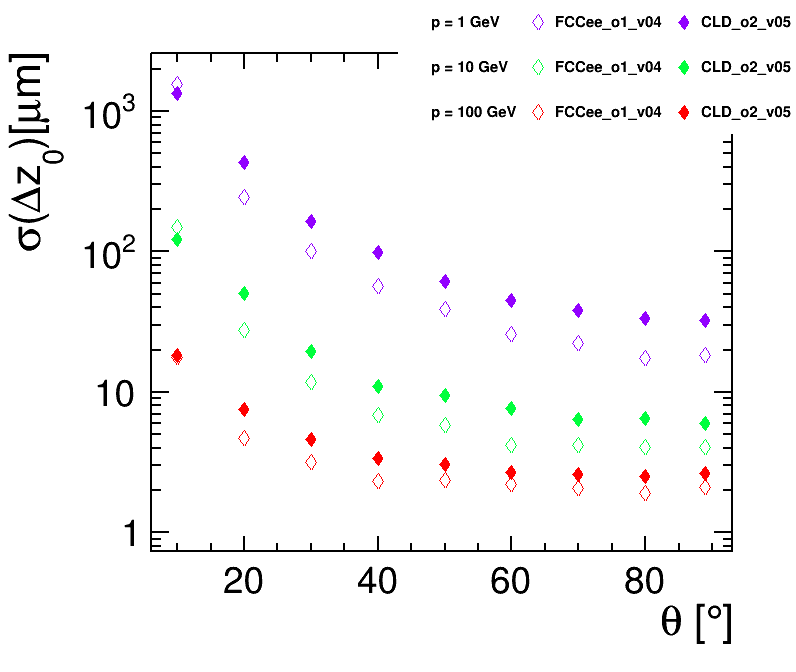

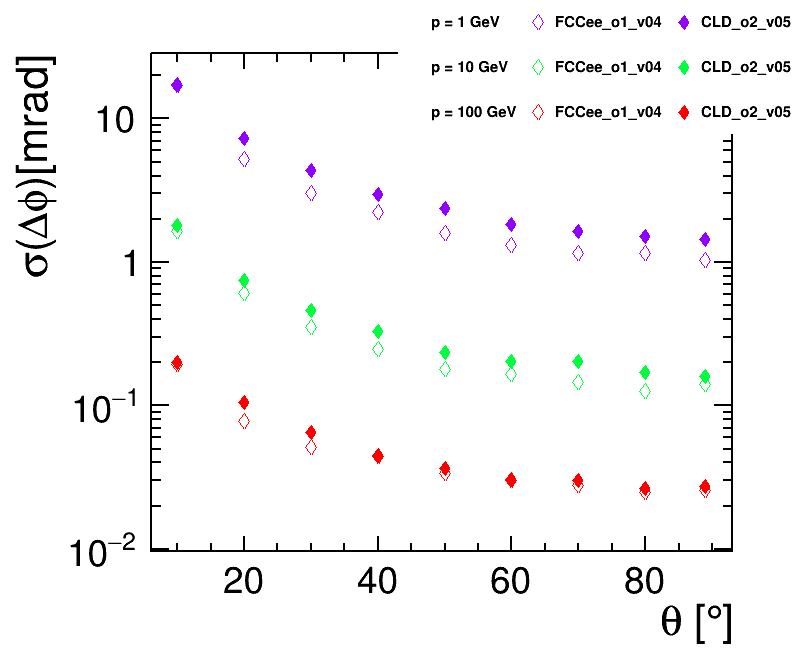

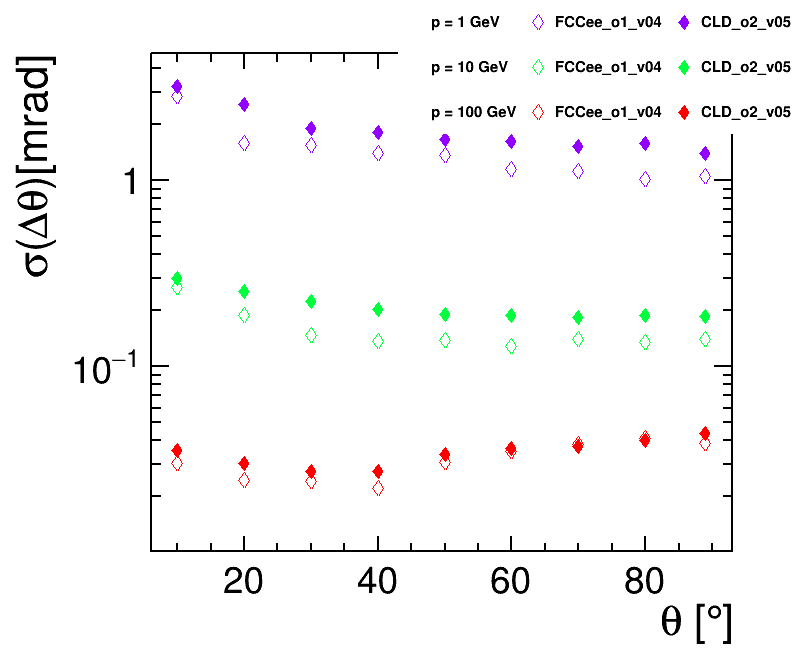

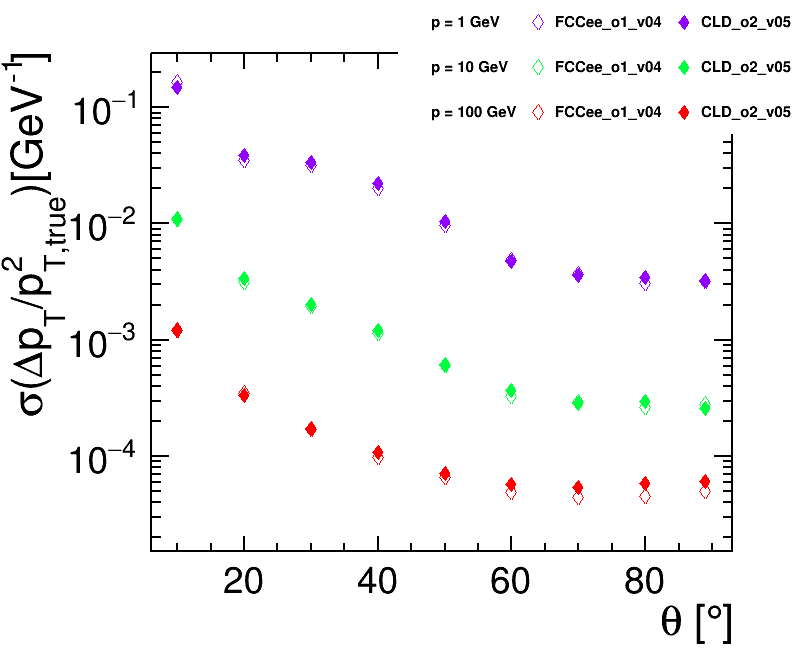

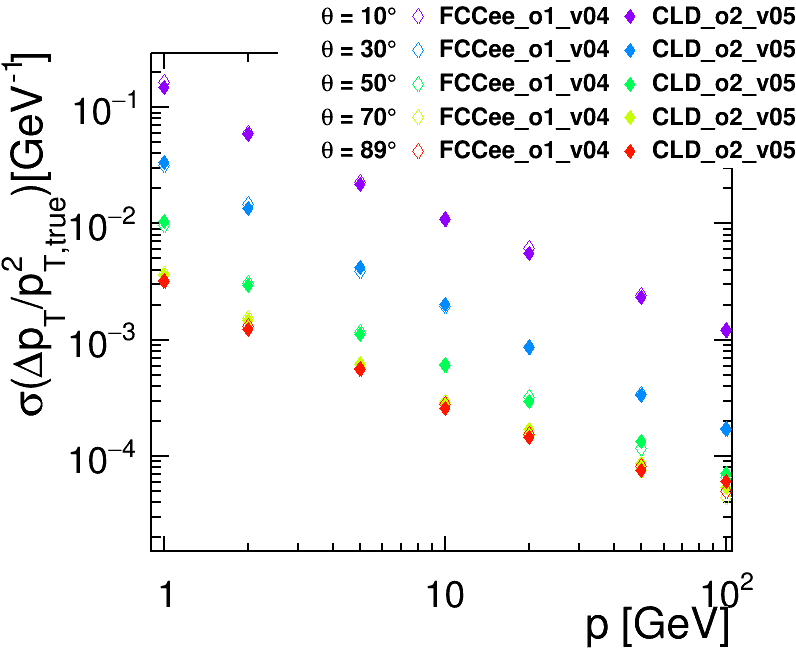

In [7]:
c = {}
mg = {}
l = {}
for p in plots:
    p1 = f1.Get(p)
    p2 = f2.Get(p)
    c[p] = ROOT.TCanvas()
    mg[p] = ROOT.TMultiGraph()
    labels = []
    if "_t/" in p:
        labels = momenta
        l[p] = ROOT.TLegend(0.5, 0.8, 1, 1)
    elif "_p/" in p:
        labels = angles
        l[p] = ROOT.TLegend(0.35, 0.75, 1, 1)
        c[p].SetLogx()
    l[p].SetNColumns(3)
    for i, g in enumerate(zip(p1, p2)):
        l[p].AddEntry(0, labels[i], "")
        g[0].SetMarkerStyle(ROOT.kOpenDiamond)
        l[p].AddEntry(g[0], model1, "p")
        mg[p].Add(g[0])
        # g2
        g[1].SetMarkerStyle(ROOT.kFullDiamond)
        l[p].AddEntry(g[1], model2, "p")
        mg[p].Add(g[1])
    mg[p].SetTitle(p1.GetTitle())
    mg[p].Draw("APX")
    l[p].Draw()
    c[p].SetLogy()
    c[p].Draw()
    c[p].SaveAs(f"Output/comparison/{p}.pdf")